In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [27]:
IMAGE_SIZE=256
BATCH_SIZE=32
EPOCS=50

In [5]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
"PlantVillage",
shuffle=True,
image_size=(IMAGE_SIZE,IMAGE_SIZE),
batch_size=BATCH_SIZE)

Found 2152 files belonging to 3 classes.


In [6]:
class_name=dataset.class_names
class_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:
len(dataset
   )

68

In [11]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
    print(label_batch.shape)
    print(image_batch[0])

(32, 256, 256, 3)
[1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 2 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 2]
(32,)
tf.Tensor(
[[[153. 140. 147.]
  [153. 140. 147.]
  [152. 139. 146.]
  ...
  [149. 136. 145.]
  [148. 135. 144.]
  [145. 132. 141.]]

 [[153. 140. 147.]
  [151. 138. 145.]
  [149. 136. 143.]
  ...
  [147. 134. 143.]
  [144. 131. 140.]
  [138. 125. 134.]]

 [[154. 141. 148.]
  [151. 138. 145.]
  [148. 135. 142.]
  ...
  [153. 140. 149.]
  [150. 137. 146.]
  [145. 132. 141.]]

 ...

 [[166. 156. 164.]
  [163. 153. 161.]
  [162. 152. 160.]
  ...
  [164. 153. 161.]
  [163. 152. 160.]
  [161. 150. 158.]]

 [[172. 162. 170.]
  [169. 159. 167.]
  [167. 157. 165.]
  ...
  [162. 151. 159.]
  [162. 151. 159.]
  [162. 151. 159.]]

 [[175. 165. 173.]
  [172. 162. 170.]
  [170. 160. 168.]
  ...
  [159. 148. 156.]
  [161. 150. 158.]
  [165. 154. 162.]]], shape=(256, 256, 3), dtype=float32)


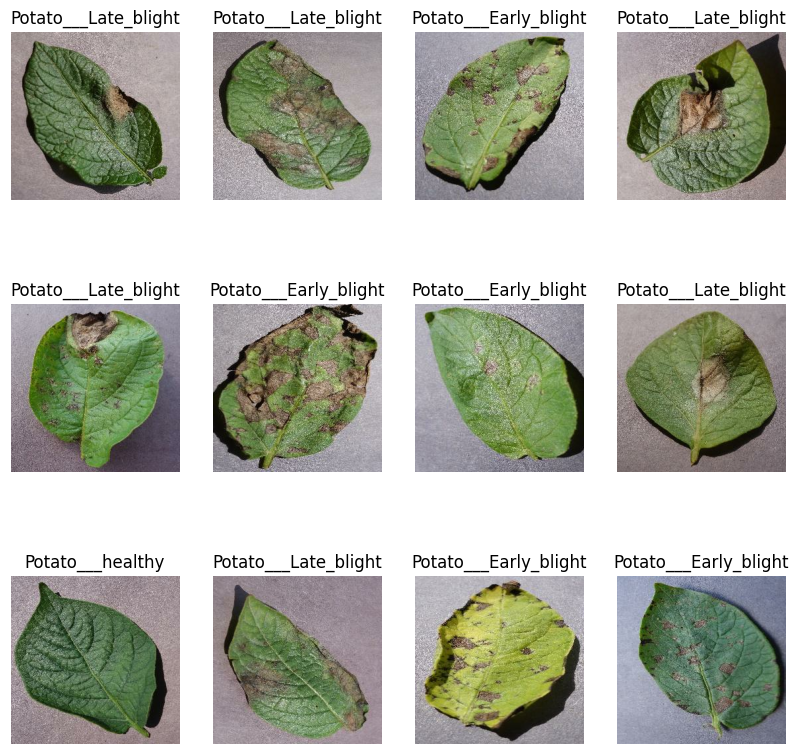

In [25]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis("off")
        plt.title(class_name[label_batch[i]])
#     print(image_batch[0])

In [26]:
len(dataset)

68

In [35]:
# training dataset=> 80 %
# validation => 10%
# test =>10%
train_size=int(0.8*len(dataset))
train_ds=dataset.take(train_size)
len(train_ds)

54

In [36]:
test_ds=dataset.skip(train_size)
len(test_ds)

14

In [37]:
vald_size=int(0.5*len(test_ds))
vald_ds=test_ds.take(vald_size)

test_ds=test_ds.skip(vald_size)



7
7
7


In [43]:
def get_detaset_partitions_tf(dataset,shuffle=True,shuffle_size=10000):
    
    if shuffle:
        dataset=dataset.shuffle(shuffle_size,seed=12)
    
    train_size=int(0.8*len(dataset))
    train_ds=dataset.take(train_size)
    
    test_ds=dataset.skip(train_size)
    
    valid_size=int(0.5*len(test_ds))
    valid_ds=test_ds.take(vald_size)
    
    test_ds=test_ds.skip(vald_size)
    
    return train_ds,valid_ds,test_ds

In [44]:
train_ds,valid_ds,test_ds=get_detaset_partitions_tf(dataset)

In [45]:
len(train_ds)

54

In [46]:
len(test_ds)

7

In [47]:
len(valid_ds)

7

In [48]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
vald_ds=valid_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [50]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [51]:
tf.keras.sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0,2)
])

AttributeError: module 'tensorflow.keras' has no attribute 'sequential'